# Image Identification using CNN
## Author - Catalina Ifrim

In [ ]:
"""
UW DATASCI420-Machine Learning Techniques
L09-DNN_Tensor_Flow

"""

### Instructions

For this project you will use the **CIFAR-10 dataset**, which consists of 60000 32x32 color images, in 10 classes with 6000 images
per class. There are 50000 training images and 10000 test images.
You are tasked to **build a machine learning model** that is able to **identify the objects in images**. The model you are 
building will help in providing the capability to search for 10 objects.

Using the CIFAR-10 dataset, create a new notebook to build a TensorlLow model. Perform each of the following tasks and answer
the related questions:

1. Read CIFAR-10 dataset from Keras.
2. Explore data
3. **Preprocess and prepare data** for classification
4. **Build a TensorFlow model using a single dense hidden layer**
5. Apply model to test set and evaluate accuracy
6. **Perform 3 adjusts to the number of layers and activation functions to improve accuracy**
7. Summarize your findings regarding the different iterations and any insights gained

### Dataset description

The CIFAR-10 dataset consists of 60000 colour images in 10 classes, with 6000 images per class. The images in CIFAR-10 are 
low-resolution (32x32). There are 50000 training images and 10000 test images. The classes in the dataset are:<br>
**airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck**.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras import utils

%matplotlib inline

### 1. Read CIFAR-10 dataset from Keras

The CIFAR-10 dataset is loaded from keras, split into training and testing sets, then printed the shape of the sets. 

In [2]:
from tensorflow.keras.datasets import cifar10

# loading the dataset and split it into training and testing
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
# Print the shape of train and test sets
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (50000, 32, 32, 3)
y_train shape (50000, 1)
X_test shape (10000, 32, 32, 3)
y_test shape (10000, 1)


### 2. Explore data

Below are plotted some training images with their associated classes or digit. 

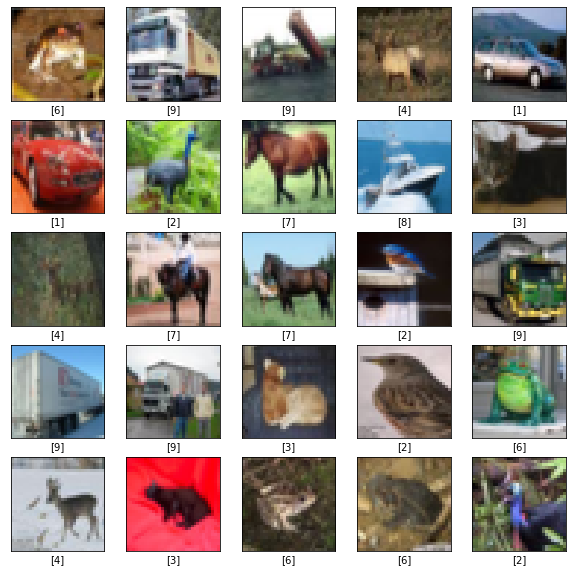

In [5]:
# Plot a sample from the dataset
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

### 3. Preprocess and prepare data for classification

Before building the classification model, the image pixel values need to be normalized. To scale the values in range between
0 and 1, we will divide by 255. To check how scaling worked, it is plotted an image before and after scaling. 
The categorical column is one-hot encoded using keras numpy-related utilities.   

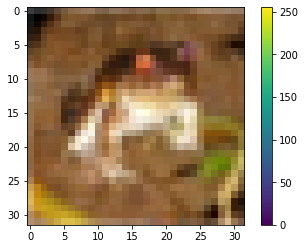

In [6]:
# Plot a image before scaling
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
# building the input vector from the 32x32 pixels
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)    
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255            
X_test /= 255

# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = utils.to_categorical(y_train, n_classes)
Y_test = utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


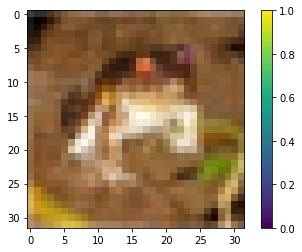

In [8]:
# Check the image after scaling
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

### 4. Build a TensorFlow model using a single dense hidden layer

Below it is built a TensorFlow Sequential() model using only one hidden layer. Building the model requires configuring 
the layers, and then compile it. This model has 3 layers: an input layer, a densely connected hidden layer, and an output layer.

The input layer is the Flaten layer which basically collapses the spatial dimensions of the input into the channel dimension. 
It takes the tensors of shape (image_height, image_width, color_channels), ignoring the batch size. The color_channels refers
to (R,G,B). So the network is configured to process inputs of shape (32, 32, 3), which is the format of CIFAR images. This 
is done by passing the argument input_shape to the first layer.
The next two layers are densely-connected, or fully-connected neural layers. The first Dense layer has 500 neurons and uses
as activation 'relu' as activation function. The second dense layer is a 10-node softmax layer representing the 10 classes. <br>

For compiling the model, it is defined the optimizer ('adam'), the loss function ('categorical_crossentropy'), and the 
metric ('accuracy') used to monitor the training steps. After compiling the model, we train it with the training data and 
by defining the number of epochs (10). It is also used a batch_size of 128, which represents the number of training examples 
used to perform one step of stochastic gradient descent (SGD). The value of 128 selected is a typical batch size value, a 
compromise between small and big batch sizes, in terms of convergence and training time. 

In [9]:
# Build a model using a single dense hidden layer

# build a linear stack of layers with the sequential model
model = Sequential()
# flatten input
model.add(Flatten(input_shape=(32, 32, 3)))
# hidden layer
model.add(Dense(500, activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
391/391 [==============================] - 5s 12ms/step - loss: 2.3950 - accuracy: 0.2526 - val_loss: 1.7963 - val_accuracy: 0.3543
Epoch 2/10
391/391 [==============================] - 4s 11ms/step - loss: 1.7448 - accuracy: 0.3814 - val_loss: 1.6899 - val_accuracy: 0.3989
Epoch 3/10
391/391 [==============================] - 4s 11ms/step - loss: 1.6616 - accuracy: 0.4130 - val_loss: 1.6615 - val_accuracy: 0.4164
Epoch 4/10
391/391 [==============================] - 5s 14ms/step - loss: 1.6156 - accuracy: 0.4299 - val_loss: 1.5944 - val_accuracy: 0.4334
Epoch 5/10
391/391 [==============================] - 5s 14ms/step - loss: 1.5577 - accuracy: 0.4529 - val_loss: 1.5800 - val_accuracy: 0.4426
Epoch 6/10
391/391 [==============================] - 5s 14ms/step - loss: 1.5409 - accuracy: 0.4547 - val_loss: 1.5463 - val_accuracy: 0.4548
Epoch 7/10
391/391 [==============================] - 6s 14ms/step - loss: 1.5106 - accuracy: 0.4656 - val_loss: 1.4975 - val_accuracy: 0.4689

The model achieved a **training accuracy of only ~49%**. Next is calculated the test accuracy.

### 5. Apply model to test set and evaluate accuracy

In [10]:
# Calculate test accuracy
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 1.4818 - accuracy: 0.4820
Test accuracy: 0.4819999933242798


The **test accuracy has a value of 48%**. It can be noted that the model is overfit with the accuracy of the training set being
slightly higher than the accuracy of the test set.

To check the predictions we can print the probabilities for first prediction at all the output layers. 

In [11]:
# Get predictions
predictions = model.predict(X_test)     
predictions[0]                          # probabilities for first prediction at all the output layers

array([0.02303712, 0.01503938, 0.08578517, 0.31664115, 0.02551444,
       0.09959482, 0.3649738 , 0.00047169, 0.06519237, 0.0037501 ],
      dtype=float32)

It is applied argmax to the outputs to know which class it predicted, then we can check what is the actual image for the
first test element.

In [12]:
# Apply argmax to the outputs to know the class predicted
print(np.argmax(predictions[0]))     # output for first element
print(y_test[0])                     # validate what is the actual image for the first test element

6
[3]


For the first image the prediction of 6 does match the actual class image of 3. Below are plotted several images from the test
set with their respective predicted class and associated probability.

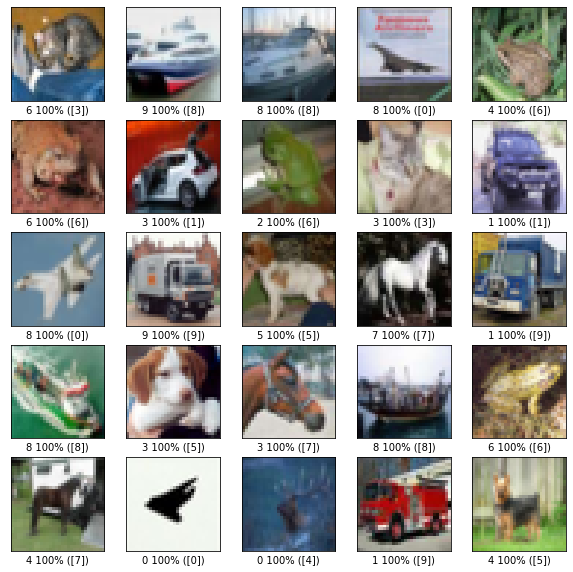

In [13]:
# Plot a sample of the test set with their respective predicted class and associated probability
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    plt.xlabel("{} {:2.0f}% ({})".format(np.argmax(predictions[i]), 100*np.max(predictions), y_test[i]))
plt.show()

It can be observed in the plotted sample that there are multiple images for which the predicted class is different than the 
expected class.

### 6. Perform 3 adjusts to the number of layers and activation functions to improve accuracy

#### 6.1. Adjust the depth and add multiple hidden layers

Trying to improve the accuracy achieved by the model with one single dense hidden layer, it was adjusted the number of hidden
layers and the depth (number of neurons in the hidden layers). There were trained and tested multiple models using combinations 
of the following parameters: 
- several hidden layers: 2, 3, 4
- various depth: 1000, 500, 250, 100
- different number of epochs for training the model: 10, 20, 30, 50
- used the same activation function 'relu' for all the models

The training accuracy results were mostly around ~53% for different models. The highest training accuracy was 
64%, achieved by a model with four hidden layers, different numbers of hidden neurons (1000, 500, 250, 100) and for 20 epochs.
The test accuracy stayed almost at the same value of 47-50% for all the models tested. The train and test accuracy results 
show that all these models were overfitted. <br>

Below it is built a model with four hidden layers, various depth (1000, 500, 250, 100) and trained for 10 epochs. 

In [14]:
# Model with four hidden layers and different depth

# building a linear stack of layers with the sequential model
model = Sequential()

# flatten input
model.add(Flatten(input_shape=(32, 32, 3)))
# hidden layer
model.add(Dense(1000, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(100, activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
391/391 [==============================] - 10s 24ms/step - loss: 2.0729 - accuracy: 0.2456 - val_loss: 1.7080 - val_accuracy: 0.3940
Epoch 2/10
391/391 [==============================] - 11s 29ms/step - loss: 1.7138 - accuracy: 0.3798 - val_loss: 1.6010 - val_accuracy: 0.4268
Epoch 3/10
391/391 [==============================] - 12s 31ms/step - loss: 1.6126 - accuracy: 0.4209 - val_loss: 1.5969 - val_accuracy: 0.4282
Epoch 4/10
391/391 [==============================] - 12s 31ms/step - loss: 1.5444 - accuracy: 0.4474 - val_loss: 1.5119 - val_accuracy: 0.4634
Epoch 5/10
391/391 [==============================] - 12s 31ms/step - loss: 1.4943 - accuracy: 0.4634 - val_loss: 1.5074 - val_accuracy: 0.4642
Epoch 6/10
391/391 [==============================] - 12s 31ms/step - loss: 1.4567 - accuracy: 0.4793 - val_loss: 1.4561 - val_accuracy: 0.4812
Epoch 7/10
391/391 [==============================] - 12s 31ms/step - loss: 1.4183 - accuracy: 0.4918 - val_loss: 1.4421 - val_accuracy:

In [15]:
# Calculate test accuracy
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 1.4863 - accuracy: 0.4723
Test accuracy: 0.4722999930381775


The model has a **train accuracy rate of 53% and a test accuracy rate of 47%**. <br>
Comparing with train and test accuracy values for the initial model with a single dense hidden layer, it can be noted 
that adding more densely connected layers and more depth did not improve significantly the accuracy. Only the train accuracy
improved slightly from 49% to 53%, but the test accuracy remained with the same value of 47-48%.

#### 6.2. Change activation function

Next it was changed the activation function from 'relu' to 'LeakyReLU' or 'sigmoid' and trained and tested multiple models.
It was started with the initial model with one single dense layer, then tested several models with more hidden layers and 
depth. <br>
The results showed that the models using either 'LeakyReLU' or 'sigmoid' activation functions, did not have an improved 
accuracy rate. The training accuracy was between 48% - 51% while the test accuracy was even lower between 46% - 50%.

Next it is trained and tested a model using the 'LeakyReLU' activation function, with four dense layers and different depth.

In [17]:
# Model using LeakyReLU activation function with four dense layers and different depth 

# building a linear stack of layers with the sequential model
model = Sequential()

# flatten input
model.add(Flatten(input_shape=(32, 32, 3)))
# hidden layer
model.add(Dense(1000, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))
model.add(Dense(500, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))
model.add(Dense(250, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))
model.add(Dense(100, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))
# output layer
model.add(Dense(10, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
391/391 [==============================] - 10s 25ms/step - loss: 2.1221 - accuracy: 0.2391 - val_loss: 1.7944 - val_accuracy: 0.3358
Epoch 2/10
391/391 [==============================] - 12s 30ms/step - loss: 1.7435 - accuracy: 0.3725 - val_loss: 1.6726 - val_accuracy: 0.3942
Epoch 3/10
391/391 [==============================] - 12s 32ms/step - loss: 1.6431 - accuracy: 0.4085 - val_loss: 1.6012 - val_accuracy: 0.4325
Epoch 4/10
391/391 [==============================] - 12s 32ms/step - loss: 1.5811 - accuracy: 0.4295 - val_loss: 1.5834 - val_accuracy: 0.4419
Epoch 5/10
391/391 [==============================] - 13s 32ms/step - loss: 1.5128 - accuracy: 0.4541 - val_loss: 1.5226 - val_accuracy: 0.4639
Epoch 6/10
391/391 [==============================] - 13s 34ms/step - loss: 1.4768 - accuracy: 0.4716 - val_loss: 1.5125 - val_accuracy: 0.4626
Epoch 7/10
391/391 [==============================] - 14s 35ms/step - loss: 1.4436 - accuracy: 0.4827 - val_loss: 1.4834 - val_accuracy:

In [18]:
# Accuracy
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 8ms/step - loss: 1.4307 - accuracy: 0.4956
Test accuracy: 0.49559998512268066


The model using the 'LeakyReLU' activation function with four dense layers and different depth has a **train accuracy rate of 
51% and a test accuracy rate of 50%**. Using a different activation function for a model with densely connected layers did not
seem to improve the accuracy.

#### 6.3 Add convolutional layers with different number of filters and hidden dense layers

In addition of more hidden dense layers and depth were added also convolutional layers. The convolutional layer creates a 
convolution kernel, convolved with the layer input to produce a tensor of outputs.
The main difference between a densely connected layer and a convolutional layer, is that the dense layer learns global
patterns in its global input space, while the convolutional layers learn local patterns in small windows of two dimensions.
 
The model built below has three convolutional layers, each of them followed by a subsampling layer in the form of a max-pooling 
operation. There are also two densely-connected layers that pass the output to a third densely-connected layer which acts as 
the final softmax output layer. <br>
In the model, the input data goes through the convolutional layers that have a kernel size of 3 x 3. For the first 
convolutional layer, it is provided the keyword argument input_shape. The input images do not need to be flatten to 1D as 
the convolutional layers are capable of working with image data in 2D. <br>
The hyperparameters in the Conv2D layers are:
- filters - this is the first argument of the Conv2D layer and is an integer and representing the number of output filters in
the convolution. The number of filters increases in the convolutional layers from 50, 75 to 125 so the model can learn more 
features. 
- strides - is a tuple of 2 integers, specifying the strides of the convolution along the height and width. 
- padding - is of type "same", which means that the output has the same height/width dimension as the input.
- activation function - is "relu"
- max-pooling - is the subsampling applied which takes the maximum value from a neighborhood of pixels. It has the
advantage of decreasing the size of features, which results in higher computational efficiency and may also reduce 
overfitting. 

For the densely-connected hidden layers it is applied 'Dropout', a type of regularization technique. It is used a 
Dropout layer and the dropout rate is specified to the layer as the probability of setting each input to the layer to zero. 

Below it is built the model, compiled and trained for a number of 10 epochs. The training and validation accuracy are 
displayed across all epochs.

In [12]:
# loading the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# building the input vector from the 32x32 pixels
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)    # reshape gives a new shape to an array without changing the data
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = utils.to_categorical(y_train, n_classes)
Y_test = utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

# building a linear stack of layers with the sequential model
model = Sequential()

# convolutional layer
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))

# convolutional layer
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# flatten output of conv
model.add(Flatten())

# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))

# output layer
model.add(Dense(10, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)
Epoch 1/10
391/391 [==============================] - 230s 588ms/step - loss: 1.8576 - accuracy: 0.3038 - val_loss: 1.1297 - val_accuracy: 0.5985
Epoch 2/10
391/391 [==============================] - 337s 861ms/step - loss: 1.1367 - accuracy: 0.5983 - val_loss: 0.9199 - val_accuracy: 0.6769
Epoch 3/10
391/391 [==============================] - 329s 841ms/step - loss: 0.9479 - accuracy: 0.6651 - val_loss: 0.7867 - val_accuracy: 0.7267
Epoch 4/10
391/391 [==============================] - 342s 875ms/step - loss: 0.8019 - accuracy: 0.7215 - val_loss: 0.7443 - val_accuracy: 0.7450
Epoch 5/10
391/391 [==============================] - 343s 877ms/step - loss: 0.7252 - accuracy: 0.7473 - val_loss: 0.7318 - val_accuracy: 0.7492
Epoch 6/10
391/391 [==============================] - 360s 921ms/step - loss: 0.6538 - accuracy: 0.7719 - val_loss: 0.6789 - val_accuracy: 0.7637
Epoch 7/10
391/391 [==================

Next it is calculated the test accuracy score.

In [13]:
# Calculate test accuracy
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 9s 29ms/step - loss: 0.6380 - accuracy: 0.7813
Test accuracy: 0.7813000082969666


The model achieved the highest **training accuracy of 83% and a test accuracy of 78%**. It is the highest accuracy achieved from
all the models built. 

### 7. Summarize your findings regarding the different iterations and any insights gained

The results above show that by using a simple model architecture with only densely hidden connected layers, we only get a low 
accuracy rate of around 60%. Adding multiple dense layers and more depth did not improve the accuracy score too much: only 
the train accuracy slightly improved to ~60%, but the test accuracy remained at the same value of 47-48%.<br>
Changing the activation function for models with densely connected layers did not seem to improve the accuracy score also: the
training accuracy score was between 48%-51% and the test accuracy score was even lower at ~46%-50%.<br>

**Adding convolutional layers** to a model **significantly improved the accuracy rate**. A model with **three convolutional 
layers and two hidden densely connected layers** achieved a **training accuracy rate of 83%** and a **testing accuracy rate of 
78%**.<br> 
It can be noted though that adding convolutional layers to the model was also very computationally expensive.